In [ ]:
system("mkdir -p data_dir")
system("cd data_dir; curl -L 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE191176&format=file' -o data.tar")

In [30]:
h5_files <- list.files("data_dir" , pattern = "h5")
samples <- stringr::str_replace(h5_files, "^([A-Za-z0-9]+).*$", "\\1")
names(h5_files) <- samples

In [32]:
library(Seurat)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [29]:
so = list()
scd = list()
for (spl in names(h5_files)){
    data_path <- paste("data_dir/",h5_files[[spl]], sep = "")
    scd[[spl]] <- Seurat::Read10X_h5(data_path)
    so[[spl]] <- CreateSeuratObject(counts = scd[[spl]], min.cells = 3, min.features = 200)
    so[[spl]][["percent.Flu"]] <- PercentageFeatureSet(so[[spl]], pattern = "^Influ")
    so[[spl]][["percent.mt"]] <- PercentageFeatureSet(so[[spl]], pattern = "^MT-")
}
# Represent percent.Flu per sample (spl) using ggplot 2

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


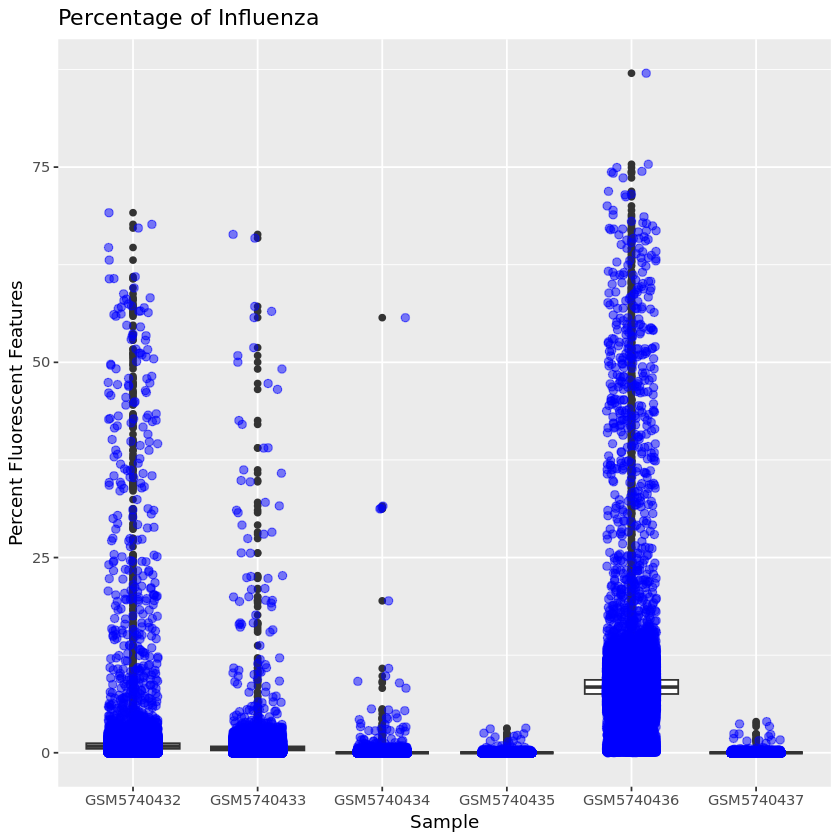

In [36]:
# Step 1: Aggregate percent.Flu values
percent_flu_data <- lapply(samples, function(spl) {
  data.frame(
    sample = spl,
    percentFlu = FetchData(so[[spl]], "percent.Flu")
  )
}) %>% bind_rows()

# Step 2: Create the plot with ggplot2
ggplot(percent_flu_data, aes(x = sample, y = percent.Flu)) +
  geom_boxplot() + # Adds a boxplot
  geom_jitter(width = 0.2, size = 2, color = "blue", alpha = 0.5) + # Adds jittered points  theme_minimal() +
  labs(title = "Percentage of Influenza",
       x = "Sample",
       y = "Percent Fluorescent Features")

From NCBI We got:

- GSM5740432_S2 	Infected Untreated
- GSM5740433_S3 	Infected + 6'SLN-CD
- GSM5740434_S4 	Infected + IFN lambda
- GSM5740435_S5 	Infected + 6'SLN-CD + IFN lambda
- GSM5740436_S1 	Mock Steady State
- GSM5740437_S6 	Mock + 6'SLN-CD + IFN lambda

I suppose the right thing is:

- GSM5740436_S1     Infected Untreated
- GSM5740432_S2 	Infected + 6'SLN-CD
- GSM5740433_S3 	Infected + IFN lambda
- GSM5740434_S4 	Infected + 6'SLN-CD + IFN lambda
- GSM5740435_S5 	Mock Steady State
- GSM5740437_S6 	Mock + 6'SLN-CD + IFN lambda



In [2]:
for (i in 2:7){
    file_path = "https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5740nnn/GSM574043",
    "/suppl/GSM574043",
    "%5FS2%2Eraw%5Fmatrix%2Eh5"
}

[1] 1 2 3 4